In [1]:
%run C://Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
def two_point(k):
    a_x = np.random.randint((k-1)//2)*2
    a_y = np.random.randint((k-1)//2)*2
    b_x = np.random.randint((k-1)//2) * 2
    b_y = np.random.randint((k-1)//2) * 2
    while abs(b_x - a_x) < 10 :
        b_x = np.random.randint((k-1)//2) * 2

    while abs(b_y - a_y) < 10:
        b_y = np.random.randint((k-1)//2) * 2
        
    c_x = min(a_x,b_x)
    c_y = min(a_y,b_y)
    d_x = max(a_x,b_x)
    d_y = max(a_y,b_y)
    return (c_x, c_y, d_x, d_y)

def upper(D,a_x,a_y,b_x,b_y,c_x,c_y):
    rr = (b_y - a_y)
    for i in range (c_x - a_x):
        r = b_x - a_x
        x = a_x + i
        y = int(a_y + np.sqrt(r*r - (i-r)**2)/r*(b_y-a_y))
        D[x][y] = 1 
        
    for i in range(rr*2):
        y = b_y - i
        x = int (b_x + np.sqrt(rr*rr - (i - rr)**2)/rr*(c_x - b_x) )
        D[x][y] = 1 
    return (D)
def bottom(D,a_x,a_y,b_x,b_y,c_x,c_y):
    rr = (b_y - a_y)
    for i in range (c_x - a_x):
        r = b_x - a_x
        x = a_x + i
        y = int(a_y - np.sqrt(r*r - (i-r)**2)/r*(b_y-a_y))
        D[x][y] = 1 
   
    for i in range(rr*2):
        y = b_y - i
        x = int (b_x - np.sqrt(rr*rr - (i - rr)**2)/rr*(c_x - b_x) )
        D[x][y] = 1 
    return(D)
        
        
def zeros(k):
    mat = np.zeros((k,k))
    return (mat)

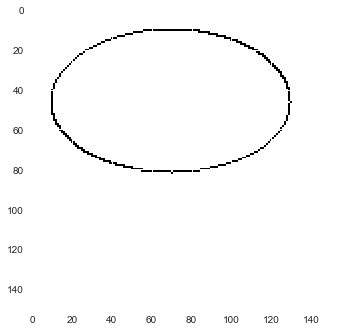

In [13]:
def ellipse(k):
    D = zeros(k)
    aa_x, aa_y, bb_x, bb_y = two_point(k)
    a_x = aa_x
    a_y = (aa_y + bb_y) // 2
    b_x = (aa_x + bb_x ) // 2 
    b_y = bb_y
    c_x = bb_x
    c_y = (aa_y + bb_y) // 2
    d_x = (aa_x + bb_x ) // 2 
    d_y = aa_y
    
    A = upper(D,a_x,a_y,b_x,b_y,c_x,c_y)
    B = bottom(D,a_x,a_y,b_x,b_y,c_x,c_y)
    return (B)  

plt.imshow(ellipse(150))

plt.show()

In [34]:
D = np.arange(5000*50*50).reshape(5000,50,50)
for i in range (5000):
    D[i] =ellipse(50)

In [35]:
E = D.reshape(5000,-1)

In [37]:
F = np.zeros((5000,1))

In [42]:
ellipses = pd.DataFrame(E)

In [43]:
cat = pd.DataFrame(F*2)
cat.columns ={"cat"}

In [44]:
el = pd.merge(cat,ellipses,left_index=True, right_index=True)

In [45]:
ell = el.iloc[:,1:]
ell

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


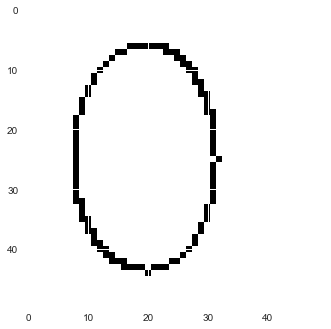

In [47]:
plt.imshow(ell.iloc[6].reshape(50,50))
plt.show()

In [48]:
ell.to_csv("ellipse.csv")